/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making t

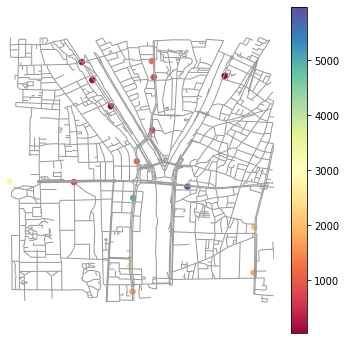

/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [1]:
import os
import src.graph_maker as graph_maker
gm = graph_maker.KyotoMapGraphMaker()
gm.make_graph(min_lat=35.02, max_lat= 35.04, min_lon=135.76, max_lon = 135.78)
gm.cp_dict_sd()
gm.plot_bus_stop()
gm.save()

import src.data_loader as DataLoader
data_loader = DataLoader.DataLoader("Kyoto", prior="uniform", graph_maker=gm)

import src.Mechanisms as Mec
mec = Mec.GraphExponentialMechanism(data_loader)

In [16]:
import joblib
def score(mec):
    score = {}
    score["SQL"] = mec.compute_SQL()
    score["optimal_AE"] = mec.compute_AE()
    score["bayes_AE"] = mec.compute_AE(attack="bayes")
    score["optimal_PC"] = score["optimal_AE"]/score["SQL"]
    score["bayes_PC"] = score["bayes_AE"]/score["SQL"]
    return score

epsilons = [0.01, 0.02, 0.03, 0.04, 0.05]
for epsilon in epsilons:
    mec.build_distribution(epsilon)
    pre_score = score(mec)
    mec.build_optimal_distribution()
    optimal_score = score(mec)
    joblib.dump(filename=f"results/optimize_kyoto/kyoto_optimize_epsilon_{epsilon}.jbl", value=[epsilon, pre_score, optimal_score])

the optimal value: 329.27891260423246

start preprocess optimization
iter  0: 1621 / 1621 , n_removed_nodes:  835
iter  1:  786 /  786 , n_removed_nodes:  297
iter  2:  489 /  489 , n_removed_nodes:  127
iter  3:  361 /  361 , n_removed_nodes:   66
iter  4:  295 /  295 , n_removed_nodes:   41
iter  5:  254 /  254 , n_removed_nodes:   28
iter  6:  226 /  226 , n_removed_nodes:   23
iter  7:  203 /  203 , n_removed_nodes:   14
iter  8:  189 /  189 , n_removed_nodes:    8
iter  9:  181 /  181 , n_removed_nodes:   14
iter 10:  167 /  167 , n_removed_nodes:   11
iter 11:  156 /  156 , n_removed_nodes:    7
iter 12:  148 /  148 , n_removed_nodes:    8
iter 13:  140 /  140 , n_removed_nodes:    7
iter 14:  133 /  133 , n_removed_nodes:    1
iter 15:  132 /  132 , n_removed_nodes:    0

start optimization
iter  0:  132 /  132 , n_removed_nodes:    0
the optimal value: 315.3602220947625
the optimal value: 45.08761490785066

start preprocess optimization
iter  0: 1621 / 1621 , n_removed_nodes:  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


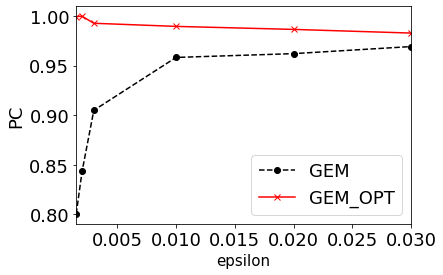

In [62]:
import joblib
import os
import re
import numpy as np

pat = re.compile("kyoto_optimize_epsilon_(\d\.\d*).jbl")
filenames = !ls results/optimize_kyoto
epsilons = []
pre_sqls = []
pre_aes = []
opt_sqls = []
opt_aes = []

pre_pcs = []
opt_pcs = []



for filename in filenames:
    epsilon = float(pat.match(filename).group(1))
    results = joblib.load(os.path.join("results" , "optimize_kyoto", filename))
    epsilon, pre_score, opt_score = results
    epsilons.append(epsilon)
    pre_sqls.append(pre_score["SQL"])
    pre_aes.append(pre_score["optimal_AE"])
    pre_pcs.append(pre_score["optimal_PC"])
    
    opt_sqls.append(opt_score["SQL"])
    opt_aes.append(opt_score["optimal_AE"])
    opt_pcs.append(opt_score["optimal_PC"])

import matplotlib.pyplot as plt
plt.plot(epsilons, pre_pcs, color="black", linestyle="dashed", marker="o", label="GEM")
plt.plot(epsilons, opt_pcs, color="red", marker="x", label="GEM_OPT")
plt.xlim(0.0015, 0.03)
plt.xlabel("epsilon", size=15)
plt.ylabel("PC")
plt.legend()
plt.rcParams["font.size"] = 18
plt.savefig("temp.eps", bbox_inches='tight', pad_inches=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


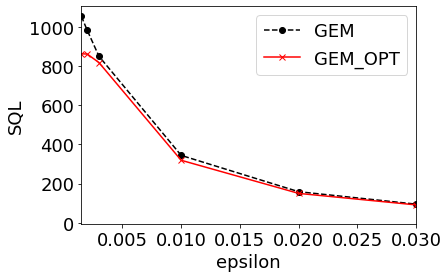

In [61]:
import matplotlib.pyplot as plt
plt.plot(epsilons, pre_sqls, color="black", linestyle="dashed", marker="o", label="GEM")
plt.plot(epsilons, opt_sqls, color="red", marker="x", label="GEM_OPT")
plt.xlim(0.0015, 0.03)
plt.xlabel("epsilon")
plt.ylabel("SQL")
plt.legend()
plt.rcParams["font.size"] = 18
plt.savefig("temp.eps")